In [21]:
import random
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### Create a Random Instagram Dataset

In [26]:
data_posts = []
start_date = datetime(2023, 8, 1)  # start_date
end_date = datetime(2023, 8, 31)   # end_date

for i in range(31):
    likes = random.randint(10, 1000000)
    comments = random.randint(20, 500)
    shares = random.randint(0, 200)
    upload_datetime = start_date + timedelta(days=random.randint(0, (end_date - start_date).days),
                                             hours=random.randint(8, 23),
                                             minutes=random.randint(0, 59),
                                             seconds=random.randint(0, 59))
    content_type = random.choice(['image', 'video'])

    data_posts.append({
        'post': f"post {i+1}",
        'content_type': content_type,
        'likes': likes,
        'comments': comments,
        'shares': shares,
        'upload_date': upload_datetime.date().strftime('%Y-%m-%d'),
        'upload_time': upload_datetime.time().strftime('%H:%M:%S'),
        })

df = pd.DataFrame(data_posts)
df.head()

,post,content_type,likes,comments,shares,upload_date,upload_time
0,post 1,video,212778,326,49,2023-08-28,21:39:59
1,post 2,video,208208,307,136,2023-08-17,13:48:09
2,post 3,image,320388,280,184,2023-08-12,12:41:09
3,post 4,image,711414,251,58,2023-08-26,20:11:08
4,post 5,image,262674,374,150,2023-08-28,10:49:09


In [27]:
# Calculating engagement for each post
total_engagement = sum(post['likes'] + post['comments'] + post['shares'] for post in data_posts)

for post in data_posts:
    post['engagement'] = post['likes'] + post['comments'] + post['shares']
    post['engagement_percentage_%'] = round((post['engagement'] / total_engagement) * 100, 2)

### Engagement Results

In [28]:
df = pd.DataFrame(data_posts)
df.head()

,post,content_type,likes,comments,shares,upload_date,upload_time,engagement,engagement_percentage_%
0,post 1,video,212778,326,49,2023-08-28,21:39:59,213153,1.47
1,post 2,video,208208,307,136,2023-08-17,13:48:09,208651,1.44
2,post 3,image,320388,280,184,2023-08-12,12:41:09,320852,2.22
3,post 4,image,711414,251,58,2023-08-26,20:11:08,711723,4.92
4,post 5,image,262674,374,150,2023-08-28,10:49:09,263198,1.82


### Sort posts by upload date and time

In [29]:
df.sort_values(by=['upload_date','upload_time']).head()

,post,content_type,likes,comments,shares,upload_date,upload_time,engagement,engagement_percentage_%
22,post 23,video,847140,431,85,2023-08-01,09:50:08,847656,5.86
14,post 15,video,811032,56,86,2023-08-03,10:36:07,811174,5.60
29,post 30,video,326009,170,126,2023-08-03,15:39:57,326305,2.25
12,post 13,video,30377,173,74,2023-08-04,10:41:22,30624,0.21
20,post 21,image,692481,316,158,2023-08-06,16:47:11,692955,4.79


### Calculating engagement per week

In [30]:
# Categorize post data by week
weekly_data = {}
for post in data_posts:
    upload_date = datetime.strptime(post['upload_date'], '%Y-%m-%d')
    week_start = upload_date - timedelta(days=upload_date.weekday())
    week_end = week_start + timedelta(days=6)
    week_range = f"{week_start.strftime('%Y-%m-%d')} - {week_end.strftime('%Y-%m-%d')}"

    if week_range not in weekly_data:
        weekly_data[week_range] = {'total_engagement': 0, 'total_percentage': 0}

    weekly_data[week_range]['total_engagement'] += post['engagement']
    weekly_data[week_range]['total_percentage'] += post['engagement_percentage_%']

In [31]:
sorted_weekly_data = dict(sorted(weekly_data.items()))

In [32]:
# Creating a DataFrame
df = pd.DataFrame(sorted_weekly_data.values(), index=sorted_weekly_data.keys())
df.index.name = 'Week'
df['Total Percentage of Engagement'] = df['total_percentage'].apply(lambda x: f"{x:.2f}%")
df

,total_engagement,total_percentage,Total Percentage of Engagement
Week,,,
2023-07-31 - 2023-08-06,2708714,18.71,18.71%
2023-08-07 - 2023-08-13,2861553,19.76,19.76%
2023-08-14 - 2023-08-20,2810211,19.41,19.41%
2023-08-21 - 2023-08-27,4220295,29.15,29.15%
2023-08-28 - 2023-09-03,1874108,12.95,12.95%


<ipython-input-33-7d129621c01c>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


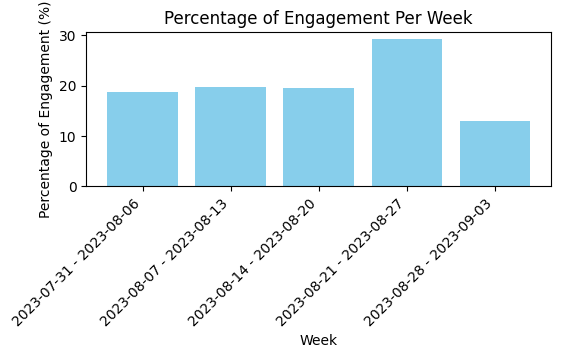

In [33]:
# Making diagrams
week_ranges = list(sorted_weekly_data.keys())
percentage_values = [data['total_percentage'] for data in sorted_weekly_data.values()]

plt.figure(figsize=(6, 2))
plt.bar(week_ranges, percentage_values, color='skyblue')
plt.xlabel('Week')
plt.ylabel('Percentage of Engagement (%)')
plt.title('Percentage of Engagement Per Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# Calculating engagement in one month (August 2023)
target_month = 8  # Agustus
target_year = 2023

engagement_in_target_month = sum(post['likes'] + post['comments'] + post['shares']
                                 for post in data_posts
                                 if datetime.strptime(post['upload_date'], '%Y-%m-%d').month == target_month
                                 and datetime.strptime(post['upload_date'], '%Y-%m-%d').year == target_year)


print(f"Total engagement in months {target_month}/{target_year} is {engagement_in_target_month}")

Total engagement in months 8/2023 is 14474881


### Image and video post engagement rate comparison

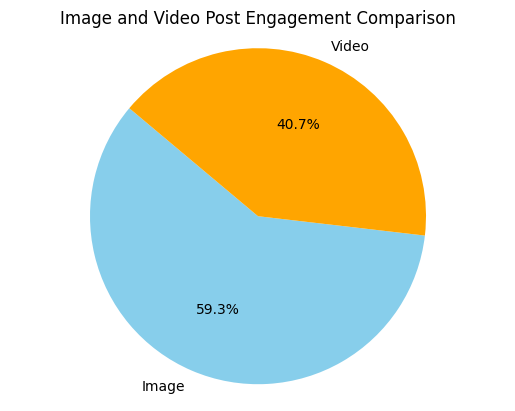

In [35]:
# Calculating total engagement for image and video posts
total_image_engagement = sum(post['engagement'] for post in data_posts if post['content_type'] == 'image')
total_video_engagement = sum(post['engagement'] for post in data_posts if post['content_type'] == 'video')

# Persentase engagement
total_engagement = total_image_engagement + total_video_engagement
persentase_image = (total_image_engagement / total_engagement) * 100
persentase_video = (total_video_engagement / total_engagement) * 100

# Data for plotting
labels = ['Image', 'Video']
sizes = [persentase_image, persentase_video]
colors = ['skyblue', 'orange']

# Make pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Image and Video Post Engagement Comparison')
plt.show()